In [1]:
from drugbank import *

In [2]:
xml_file = "drugbank_partial.xml"
namespace = {"ns": "http://www.drugbank.ca"}

# 1) 
Utworzyć ramkę danych, która dla każdego leku zawiera następujące informacje: unikalny
identyfikator leku w bazie DrugBank, nazwę leku, jego typ, opis, postać w jakiej dany lek
występuje, wskazania, mechanizm działania oraz informacje z jakimi pokarmami dany lek
wchodzi w interakcje. (4 pkt)

In [3]:
drugs_df = extract_drug_info(xml_file, namespace)

In [4]:
drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   drugbank-id          100 non-null    object
 1   name                 100 non-null    object
 2   type                 100 non-null    object
 3   description          100 non-null    object
 4   state                100 non-null    object
 5   indication           100 non-null    object
 6   mechanism-of-action  100 non-null    object
 7   food-interactions    29 non-null     object
dtypes: object(8)
memory usage: 6.4+ KB


In [5]:
drugs_df.head(10)

,drugbank-id,name,type,description,state,indication,mechanism-of-action,food-interactions
0,DB00001,Lepirudin,biotech,Lepirudin is a recombinant hirudin formed by 6...,solid,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,Avoid herbs and supplements with anticoagulant...
1,DB00002,Cetuximab,biotech,Cetuximab is a recombinant chimeric human/mous...,liquid,Cetuximab indicated for the treatment of local...,The epidermal growth factor receptor (EGFR) is...,None
2,DB00003,Dornase alfa,biotech,Dornase alfa is a biosynthetic form of human d...,liquid,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,None
3,DB00004,Denileukin diftitox,biotech,A recombinant DNA-derived cytotoxic protein co...,liquid,For treatment of cutaneous T-cell lymphoma,Denileukin diftitox binds to the high-affinity...,None
4,DB00005,Etanercept,biotech,Dimeric fusion protein consisting of the extra...,liquid,Etanercept is indicated for the treatment of m...,There are two distinct receptors for TNF (TNFR...,None
5,DB00006,Bivalirudin,small molecule,Bivalirudin is a synthetic 20 residue peptide ...,solid,For treatment of heparin-induced thrombocytope...,Inhibits the action of thrombin by binding bot...,Avoid echinacea.\n\nAvoid herbs and supplement...
6,DB00007,Leuprolide,small molecule,Leuprolide is a synthetic 9-residue peptide an...,solid,Leuprolide is indicated for the treatment of a...,Gonadotropin-releasing hormone (GnRH) is a nat...,None
7,DB00008,Peginterferon alfa-2a,biotech,Peginterferon alfa-2a is a form of recombinant...,liquid,Peginterferon alfa-2a is indicated for the tre...,Peginterferon alfa-2a is derived from recombin...,Drink plenty of fluids.
8,DB00009,Alteplase,biotech,Alteplase is a recombinant tissue plasminogen ...,liquid,Alteplase is indicated for the treatment of ac...,Alteplase is a recombinant tissue plasminogen ...,Avoid herbs and supplements with anticoagulant...
9,DB00010,Sermorelin,biotech,Sermorelin acetate is the acetate salt of an a...,liquid,"For the treatment of dwarfism, prevention of H...",Sermorelin binds to the growth hormone releasi...,None


# 2) 
Utworzyć ramkę danych pozwalającą na wyszukiwanie po DrugBank ID informacji o
wszystkich synonimach pod jakimi dany lek występuje. Napisać funkcję, która dla podanego
DrugBank ID utworzy i wyrysuje graf synonimów za pomocą biblioteki NetworkX. Należy
zadbać o czytelność generowanego rysunku. (4 pkt)

In [6]:
synonyms_df = extract_synonyms(xml_file, namespace)

In [7]:
synonyms_df.columns

Index(['drugbank-id', 'synonym'], dtype='object')

In [8]:
synonyms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   drugbank-id  597 non-null    object
 1   synonym      597 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


In [9]:
synonyms_df.head(10)

,drugbank-id,synonym
0,DB00001,"[Leu1, Thr2]-63-desulfohirudin"
1,DB00001,Desulfatohirudin
2,DB00001,Hirudin variant-1
3,DB00001,Lepirudin
4,DB00001,Lepirudin recombinant
5,DB00001,R-hirudin
6,DB00002,Cetuximab
7,DB00002,Cétuximab
8,DB00002,Cetuximabum
9,DB00003,Deoxyribonuclease (human clone 18-1 protein mo...


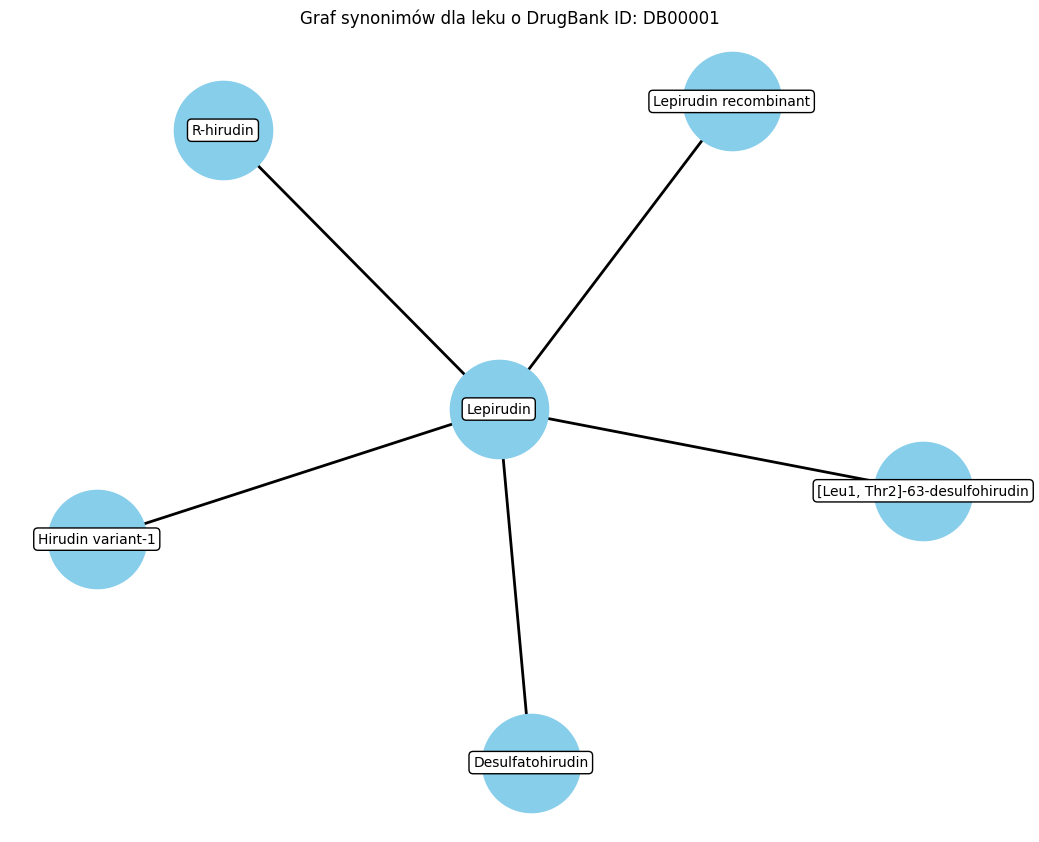

In [10]:
create_synonym_graph("DB00001", drugs_df, synonyms_df)

# 3)
Utworzyć ramkę danych o produktach farmaceutycznych zawierających dany lek
(substancję leczniczą). Ramka powinna zawierać informacje o ID leku, nazwie produktu,
producencie, kod w narodowym rejestrze USA (ang. *National Drug Code*), postać w jakiej
produkt występuje, sposób aplikacji, informacje o dawce, kraju i agencji rejestrującej
produkt. (4 pkt)

In [11]:
products_info = extract_drug_products(xml_file, namespace)

In [12]:
products_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4584 entries, 0 to 4583
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   drugbank-id   4584 non-null   object
 1   drug-name     4584 non-null   object
 2   product-name  4584 non-null   object
 3   producer      4584 non-null   object
 4   ndc-code      4559 non-null   object
 5   form          4556 non-null   object
 6   route         4568 non-null   object
 7   strength      4206 non-null   object
 8   country       4584 non-null   object
 9   agency        4584 non-null   object
dtypes: object(10)
memory usage: 358.3+ KB


In [13]:
products_info.head(10)

,drugbank-id,drug-name,product-name,producer,ndc-code,form,route,strength,country,agency
0,DB00001,Lepirudin,Refludan,Bayer,50419-150,Powder,Intravenous,50 mg/1mL,US,FDA NDC
1,DB00001,Lepirudin,Refludan,Bayer,50419-150,"Powder, for solution",Intravenous,50 mg / vial,Canada,DPD
2,DB00001,Lepirudin,Refludan,Celgene Europe Limited,50419-150,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
3,DB00001,Lepirudin,Refludan,Celgene Europe Limited,50419-150,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
4,DB00001,Lepirudin,Refludan,Celgene Europe Limited,50419-150,"Injection, solution, concentrate",Intravenous,20 mg,EU,EMA
5,DB00001,Lepirudin,Refludan,Celgene Europe Limited,50419-150,"Injection, solution, concentrate",Intravenous,20 mg,EU,EMA
6,DB00002,Cetuximab,Erbitux,ImClone LLC,66733-948,Solution,Intravenous,2 mg/1mL,US,FDA NDC
7,DB00002,Cetuximab,Erbitux,ImClone LLC,66733-948,Solution,Intravenous,2 mg/1mL,US,FDA NDC
8,DB00002,Cetuximab,Erbitux,"Imclone, Llc",66733-948,Solution,Intravenous,2 mg / mL,Canada,DPD
9,DB00002,Cetuximab,Erbitux,Merck Europe B.V.,66733-948,"Injection, solution",Intravenous,5 mg/ml,EU,EMA


# 4) 
Utworzyć ramkę danych zawierającą informacje o wszystkich szlakach wszystkich
rodzajów, tj. sygnałowych, metabolicznych, itd., z jakimi jakikolwiek lek wchodzi w interakcje.
Podać całkowitą liczbę tych szlaków. (4 pkt)

In [14]:
pathways_df = extract_pathways(xml_file, namespace)

In [15]:
pathways_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   smpdb-id      12 non-null     object
 1   pathway-name  12 non-null     object
 2   category      12 non-null     object
dtypes: object(3)
memory usage: 420.0+ bytes


In [16]:
pathways_df.head()

,smpdb-id,pathway-name,category
0,SMP0000278,Lepirudin Action Pathway,drug_action
1,SMP0000474,Cetuximab Action Pathway,drug_action
2,SMP0000277,Bivalirudin Action Pathway,drug_action
3,SMP0000280,Alteplase Action Pathway,drug_action
4,SMP0000284,Urokinase Action Pathway,drug_action


In [17]:
unique_pathways = pathways_df["smpdb-id"].nunique()

print("Liczba unikalnych szlaków:", unique_pathways)

Liczba unikalnych szlaków: 12


# 5) 
Dla każdego szlaku sygnałowego/metabolicznego w bazie danych podać leki, które
wchodzą z nim w interakcje. Wyniki należy przedstawić w postaci ramki danych jak i w
opracowanej przez siebie formie graficznej. Przykładem takiej grafiki może być graf
dwudzielny, gdzie dwa rodzaje wierzchołków to szlaki sygnałowe i leki, a poszczególne
krawędzie reprezentują interakcję danego leku z danym szlakiem sygnałowym. Należy
zadbać o czytelność i atrakcyjność prezentacji graficznej.

In [18]:
pathways_interaction_df = extract_pathways_drugs_interaction(xml_file, namespace)

In [19]:
pathways_interaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   smpdb-id      28 non-null     object
 1   pathway-name  28 non-null     object
 2   drugbank-id   28 non-null     object
 3   drug-name     28 non-null     object
dtypes: object(4)
memory usage: 1.0+ KB


In [20]:
pathways_interaction_df.head()

,smpdb-id,pathway-name,drugbank-id,drug-name
0,SMP0000278,Lepirudin Action Pathway,DB00001,Lepirudin
1,SMP0000278,Lepirudin Action Pathway,DB01022,Phylloquinone
2,SMP0000278,Lepirudin Action Pathway,DB01373,Calcium
3,SMP0000474,Cetuximab Action Pathway,DB00002,Cetuximab
4,SMP0000277,Bivalirudin Action Pathway,DB00006,Bivalirudin


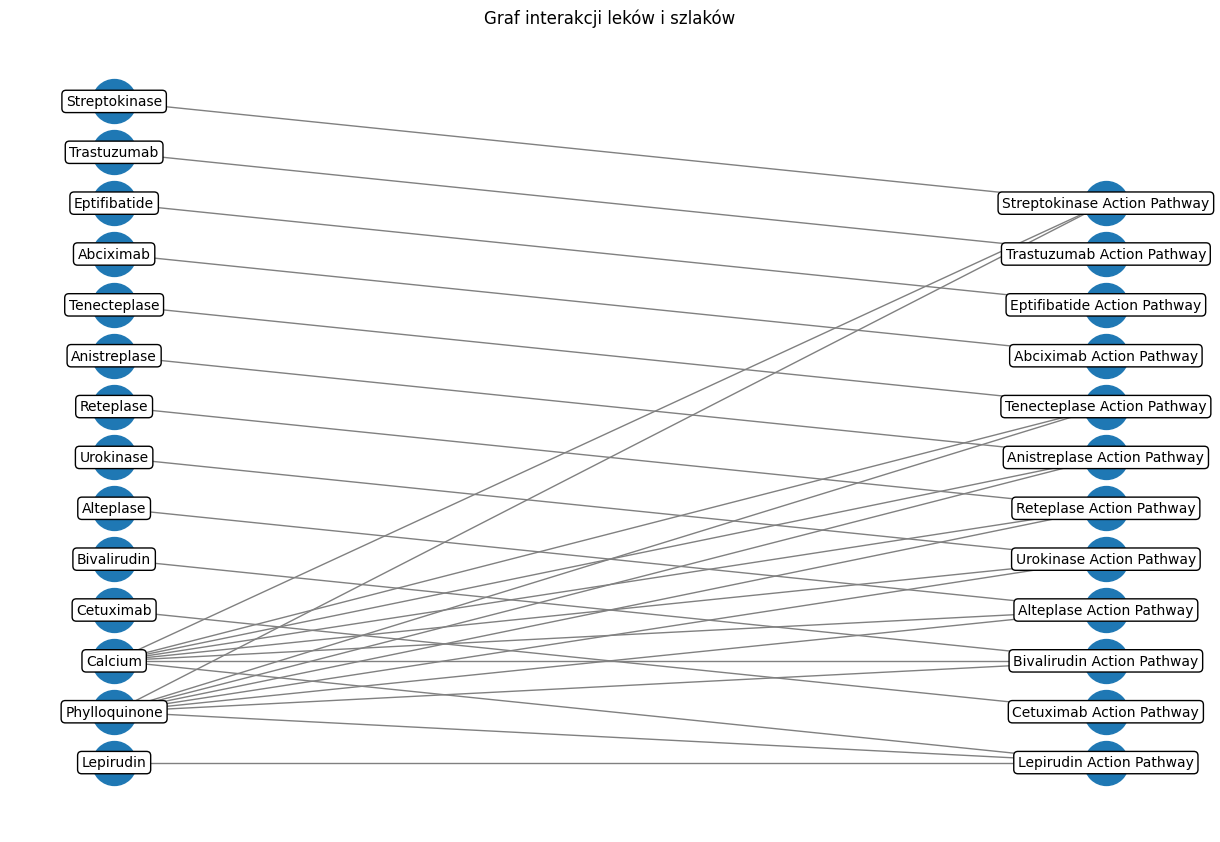

In [21]:
create_pathways_graph(pathways_interaction_df)

# 6) 
Dla każdego leku w bazie danych podać liczbę szlaków, z którymi dany lek wchodzi w
interakcje. Przedstawić wyniki w postaci histogramu z odpowiednio opisanymi osiami.

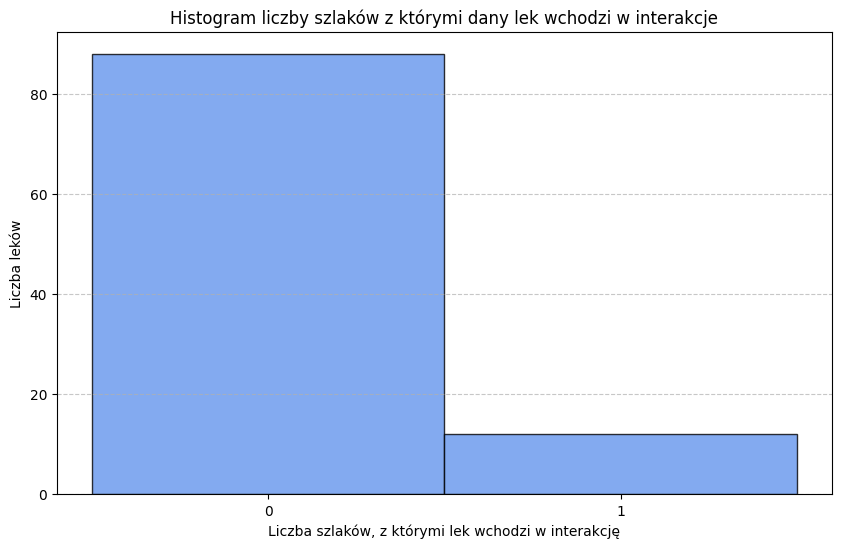

In [22]:
pathway_count_df = create_pathway_count_df(pathways_interaction_df, drugs_df)
plot_pathway_count(pathway_count_df)

In [23]:
pathway_count_df.head()

,drugbank-id,name,pathway-count
0,DB00001,Lepirudin,1
1,DB00002,Cetuximab,1
2,DB00003,Dornase alfa,0
3,DB00004,Denileukin diftitox,0
4,DB00005,Etanercept,0


# 7) 
Utworzyć ramkę danych zawierającą informacje o białkach, z którymi poszczególne leki
wchodzą w interakcje. Białka te to tzw. targety. Ramka danych powinna zawierać
przynajmniej DrugBank ID targetu, informację o zewnętrznej bazie danych (ang. *source*,
np. Swiss-Prot), identyfikator w zewnętrznej bazie danych, nazwę polipeptydu, nazwę genu
kodującego polipeptyd, identyfikator genu GenAtlas ID, numer chromosomu, umiejscowienie
w komórce. (4 pkt)

In [24]:
targets_df = extract_targets(xml_file, namespace)

In [25]:
targets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   drug-drugbank-id     249 non-null    object
 1   drug-name            249 non-null    object
 2   target-drugbank-id   249 non-null    object
 3   source               249 non-null    object
 4   external-id          249 non-null    object
 5   polypepetide-name    249 non-null    object
 6   gene-name            249 non-null    object
 7   gene-genatlas-id     240 non-null    object
 8   chromosome-location  245 non-null    object
 9   cellular-location    248 non-null    object
dtypes: object(10)
memory usage: 19.6+ KB


In [26]:
targets_df.head()

,drug-drugbank-id,drug-name,target-drugbank-id,source,external-id,polypepetide-name,gene-name,gene-genatlas-id,chromosome-location,cellular-location
0,DB00001,Lepirudin,BE0000048,Swiss-Prot,P00734,Prothrombin,F2,F2,11,Secreted
1,DB00002,Cetuximab,BE0000767,Swiss-Prot,P00533,Epidermal growth factor receptor,EGFR,EGFR,7,Cell membrane
2,DB00002,Cetuximab,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
3,DB00002,Cetuximab,BE0002094,Swiss-Prot,P02745,Complement C1q subcomponent subunit A,C1QA,C1QA,1,Secreted
4,DB00002,Cetuximab,BE0002095,Swiss-Prot,P02746,Complement C1q subcomponent subunit B,C1QB,C1QB,1,Secreted


# 8) 
Utworzyć wykres kołowy prezentujący procentowe występowanie targetów w różnych
częściach komórki. (4 pkt)

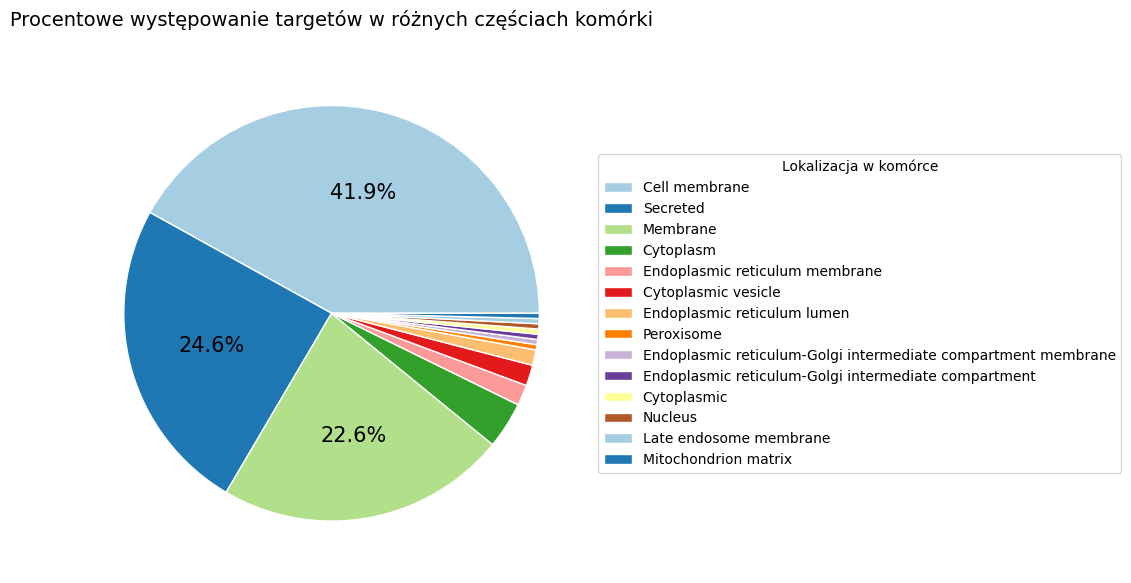

In [27]:
plot_cellural_location(targets_df)

# 9) 
Utworzyć ramkę danych, pokazującą ile leków zostało zatwierdzonych, wycofanych, ile
jest w fazie eksperymentalnej (ang. *experimental* lub *investigational*) i dopuszczonych w
leczeniu zwierząt. Przedstawić te dane na wykresie kołowym. Podać liczbę zatwierdzonych
leków, które nie zostały wycofane. (4 pkt)

In [28]:
drug_status_df = extract_drug_status(xml_file, namespace)

In [29]:
drug_status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   drugbank-id   100 non-null    object
 1   approved      100 non-null    bool  
 2   withdrawn     100 non-null    bool  
 3   experimental  100 non-null    bool  
 4   veterinary    100 non-null    bool  
dtypes: bool(4), object(1)
memory usage: 1.3+ KB


In [30]:
drug_status_df.head()

,drugbank-id,approved,withdrawn,experimental,veterinary
0,DB00001,True,True,False,False
1,DB00002,True,False,False,False
2,DB00003,True,False,False,False
3,DB00004,True,False,True,False
4,DB00005,True,False,True,False


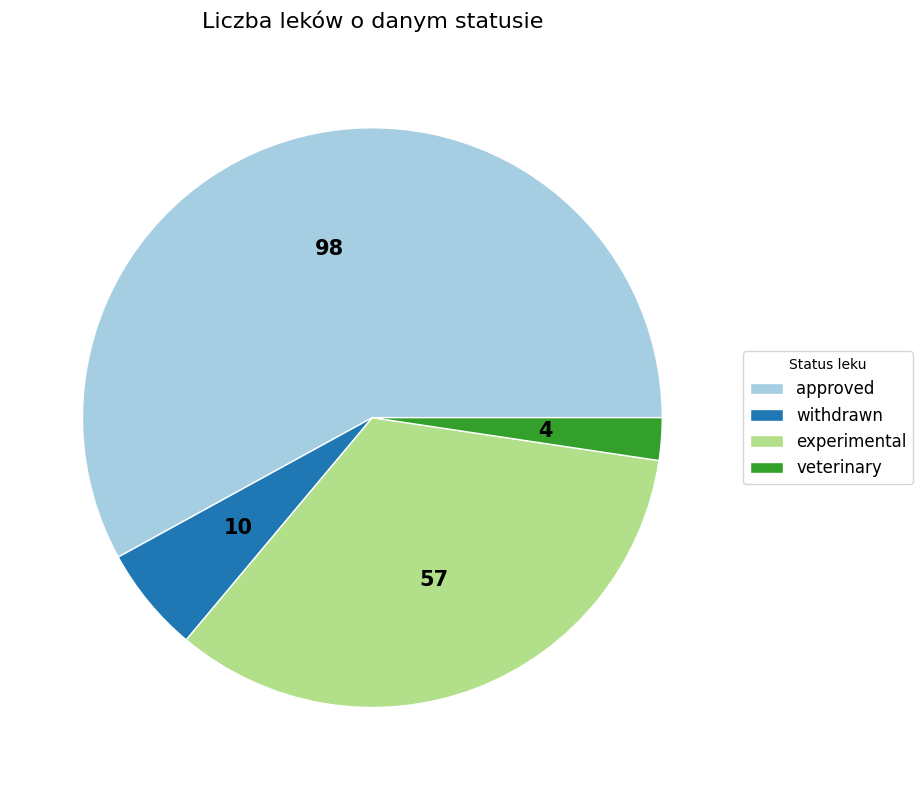

In [31]:
plot_drug_status(drug_status_df)

# 10) 
Utworzyć ramkę danych zawierającą informacje dotyczące potencjalnych interakcji
danego leku z innymi lekami. (4 pkt)

In [32]:
interaction_df = extract_interactions(xml_file, namespace)

In [33]:
interaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50688 entries, 0 to 50687
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   drugbank-id              50688 non-null  object
 1   interaction-drugbank-id  50688 non-null  object
dtypes: object(2)
memory usage: 792.1+ KB


In [34]:
interaction_df.head()

,drugbank-id,interaction-drugbank-id
0,DB00001,DB06605
1,DB00001,DB06695
2,DB00001,DB01254
3,DB00001,DB01609
4,DB00001,DB01586


# 11)

Opracować według własnego pomysłu graficzną prezentację zawierającą informacje o
konkretnym genie lub genach, substancjach leczniczych, które z tym genem/genami
wchodzą w interakcje, oraz produktach farmaceutycznych, które zawierają daną substancję
leczniczą. Wybór dotyczący tego, czy prezentacja graficzna jest realizowana dla
konkretnego genu, czy wszystkich genów jednocześnie pozostawiamy Państwa decyzji.
Przy dokonywaniu wyboru należy kierować się czytelnością i atrakcyjnością prezentacji
graficznej. (7 pkt)

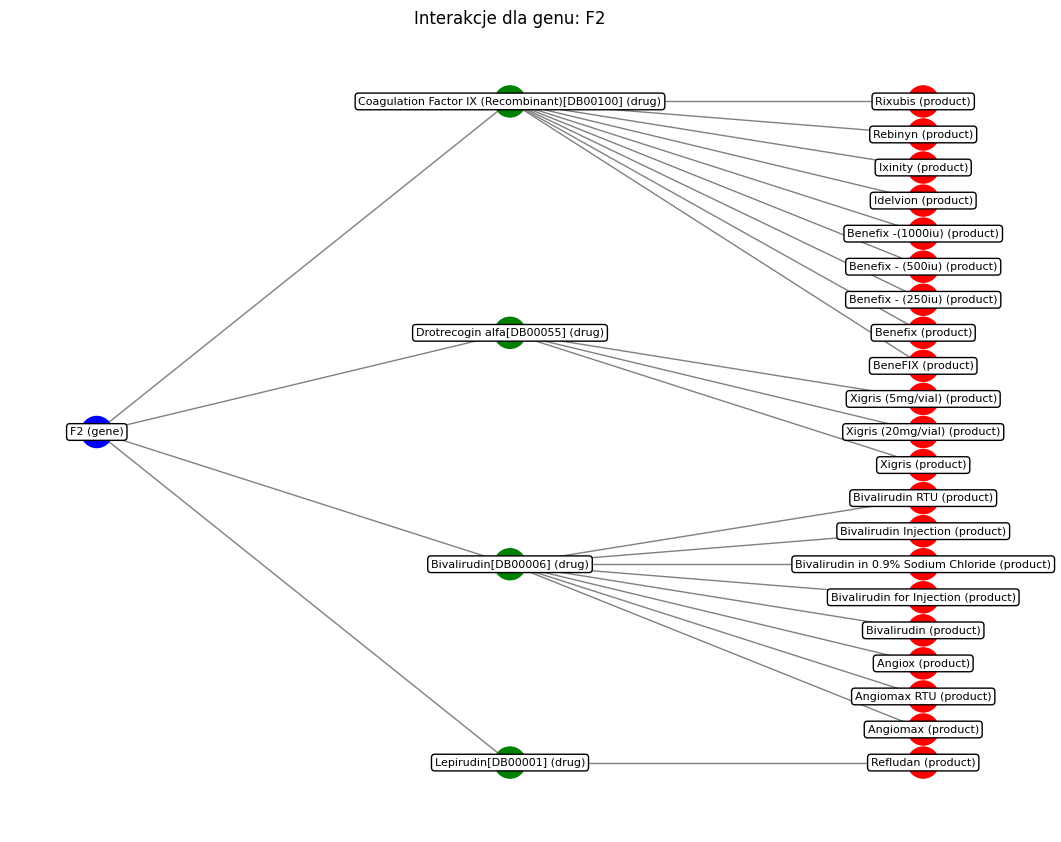

In [35]:
draw_gene_interaction_network(targets_df, products_info, "F2")

# 12) 
Zaproponować własną analizę i prezentację danych dotyczących leków. Można w tym
celu pozyskiwać dodatkowe informacje z innych biomedycznych i bioinformatycznych baz
danych dostępnych online. Należy jednak upewnić się, czy dana baza danych pozwala na
zautomatyzowane pobieranie danych przez program. Na przykład baza danych GeneCards
wprost tego zabrania, co zostało na czerwono podkreślone na tej stronie. Przykładowe bazy
danych to: UniProt (https://www.uniprot.org/), Small Molecule Pathway Database
(https://smpdb.ca/), The Human Protein Atlas (https://www.proteinatlas.org/). (7 pkt)

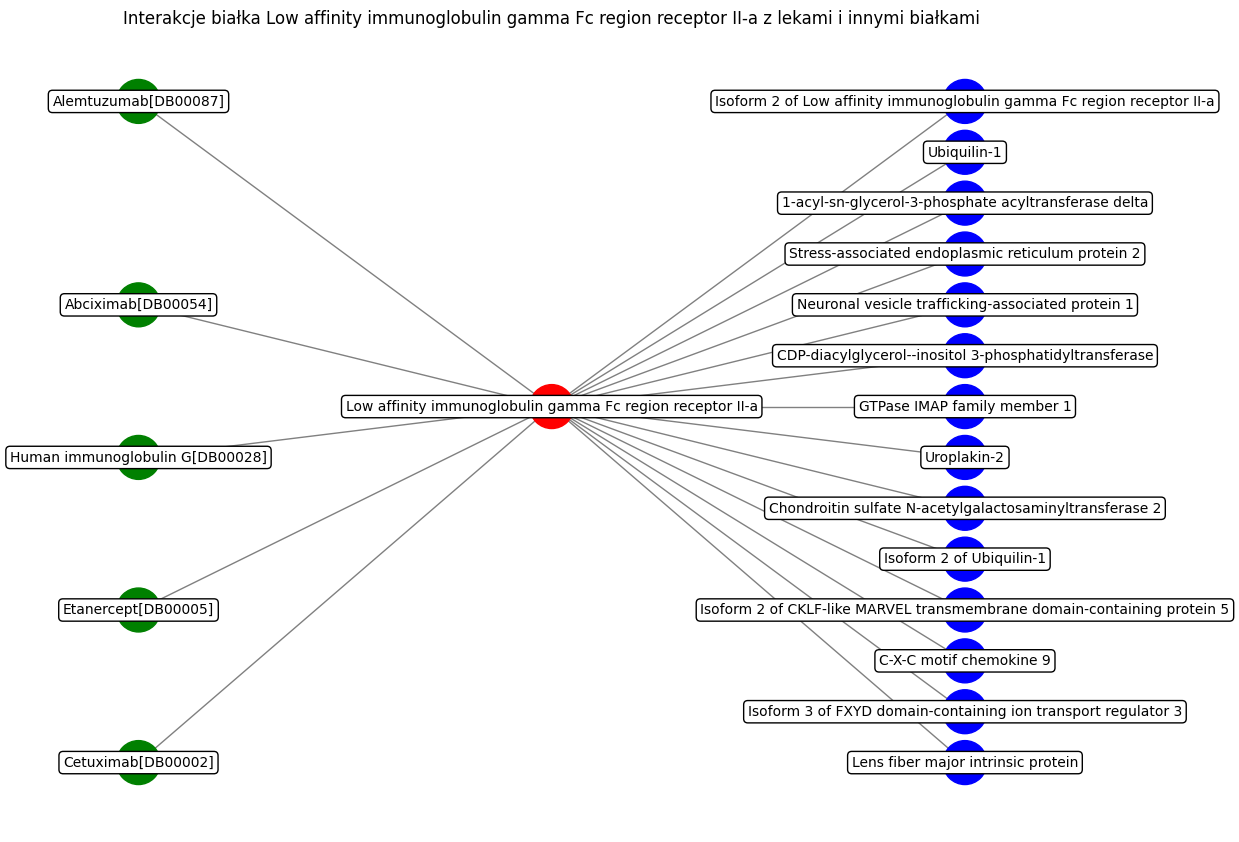

In [36]:
draw_protein_interactions("P12318", targets_df)